In [1]:
#import the installed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
%matplotlib inline
import nbformat
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)

## 2. Load the dataset

In [2]:
#load the apple dataset
apple = pd.read_csv('D:/AI/apple_prediction/AAPL.csv')

In [3]:
#to see the whole inforamtion contenet of the above dataset:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5036 non-null   object 
 1   Open       5036 non-null   float64
 2   High       5036 non-null   float64
 3   Low        5036 non-null   float64
 4   Close      5036 non-null   float64
 5   Adj Close  5036 non-null   float64
 6   Volume     5036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.5+ KB


In [4]:
#to see the first five data content of the above dataset:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/24/2003,0.265357,0.268393,0.246429,0.263214,0.224026,180252800
1,2/25/2003,0.262143,0.269286,0.260357,0.268214,0.228282,188641600
2,2/26/2003,0.267679,0.268214,0.258571,0.258929,0.220379,217095200
3,2/27/2003,0.260179,0.267857,0.259107,0.265357,0.225850,154341600
4,2/28/2003,0.265357,0.269464,0.263750,0.268036,0.228130,195098400


## 3. Prepare the dataset

In [5]:
#covert the date column into date time using pandas
apple['Date'] = pd.to_datetime(apple['Date'])

In [6]:
#to get the days in the last 20 years 
print(f'The dataframe contians stocks price between {apple.Date.min()} to {apple.Date.max()} is:')
days = apple.Date.max() - apple.Date.min()
print(f'Total days = {(days).days} days')

The dataframe contians stocks price between 2003-02-24 00:00:00 to 2023-02-23 00:00:00 is:
Total days = 7304 days


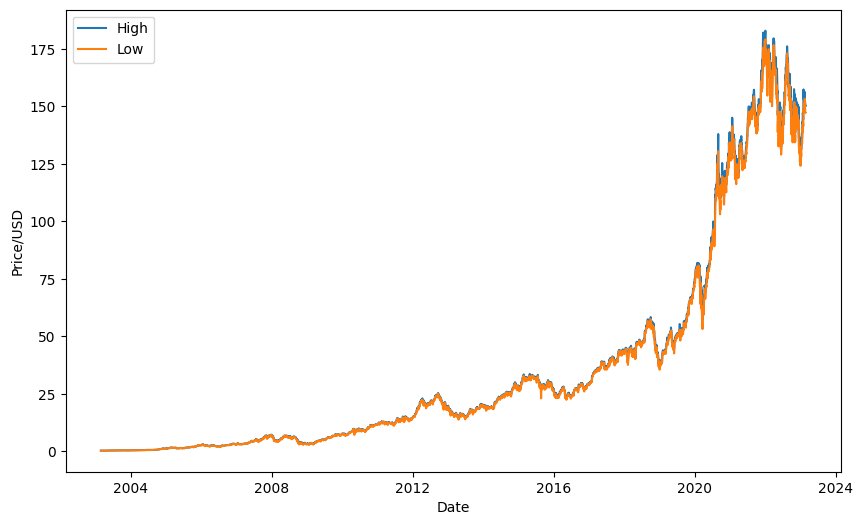

In [7]:
#plotting the LOW Vs HIGH
plt.figure(figsize = (10,6))
plt.plot(apple['Date'], apple['High'], label = 'High')
plt.plot(apple['Date'], apple['Low'], label = 'Low')
plt.xlabel('Date')
plt.ylabel('Price/USD')
plt.legend()
plt.gcf().autofmt_xdate
plt.show()

In [8]:
#find out statstic parameter using describe function
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,35.346956,35.749279,34.952580,35.366967,33.964792,4.168497e+08
std,45.442383,46.012425,44.899030,45.480566,45.413599,3.930372e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.519590e+07
25%,4.429732,4.503839,4.347589,4.428482,3.769163,1.276466e+08
50%,18.750000,18.932143,18.607143,18.763571,16.394505,2.859724e+08
75%,42.528752,42.915626,42.161876,42.461250,40.544452,5.837370e+08
max,182.630005,182.940002,179.119995,182.009995,180.683853,3.372970e+09


<Axes: >

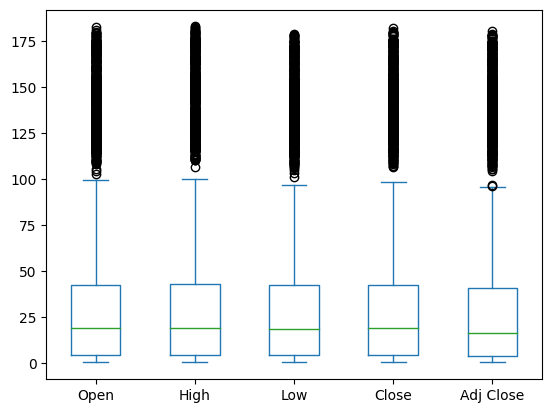

In [9]:
#prepare a box to hold each columns
apple[['Open','High','Low','Close','Adj Close']].plot(kind = 'box')

In [10]:
# setting the layout for the plot using go
layout = go.Layout(width=1000, height=700,
    title = 'Stocks Price for Apple Stocks',
    xaxis = dict(
        title = 'Date/time',
        titlefont = dict(
            family = 'Arial, monospace',
            size = 16,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price/USD',
        titlefont = dict(
            family = 'Arial, monospace',
            size = 16,
            color = '#7f7f7f'
        )
    )
)

apple_data = [{'x':apple['Date'], 'y':apple['Close']}]
plot = go.Figure(data = apple_data, layout = layout)

In [11]:
#plot offile using iplot library
iplot(plot)

## 3. Using Regression model

In [12]:
#Splite the dataset into train=70% and test=30% sets use close as y
X = np.array(apple.index).reshape(-1,1)
Y = apple['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)

In [13]:
scaler = StandardScaler().fit(X_train)

In [14]:
#Create lienar regression model:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [22]:
# setting the layout for the plot using go
layout2 = go.Layout(width=1000, height=700,
    title = 'Stocks Price for Apple Stocks using LR',
    xaxis = dict(
        title = 'Date/time',
        titlefont = dict(
            family = 'Arial, monospace',
            size = 16,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price/USD',
        titlefont = dict(
            family = 'Arial, monospace',
            size = 16,
            color = '#7f7f7f'
        )
    )
)


In [23]:
#plot the actual and predicted values for tarin dataset:
trace_0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    name = 'Actual Value',
    mode = 'markers'
)
Y_prdicted = lrm.predict(X_train).T
trace_1 = go.Scatter(
    x = X_train.T[0],
    y = Y_prdicted,
    name = 'Predicted Value',
    mode = 'lines'
)
apple_data = [trace_0, trace_1]
layout.xaxis.title.text = 'Days'
plot2 = go.Figure(data = apple_data, layout = layout2)

In [24]:
iplot(plot2)

In [17]:
#Compute the scores and accuracy of the model evaluation:
scores = f''' {'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lrm.predict(X_train))}\t{r2_score(Y_test, lrm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lrm.predict(X_train))}\t{mse(Y_test, lrm.predict(X_test))}'''
print(scores)

 Metric           Train                Test        
r2_score  0.680661113737036	0.6767319713481672
MSE       660.8784059978773	678.2685603316238
